In [1]:
%load_ext autoreload
%autoreload

In [44]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

from masterthesis.utils import PROJECT_ROOT, IMG_DIR

sns.set(context='paper', style='whitegrid')

In [39]:
df = pd.read_csv(str(PROJECT_ROOT / 'metrics.csv'))

In [46]:
full = df[df.n_class == 7]
print(len(full))
full.head()

39


,MAE,RMSE,filename,macro F1,macro MAE,macro RMSE,micro F1,n_class,pearson,spearman,weighted F1
0,0.837398,1.144091,mlp_word-03-01_11-53-35.pkl,0.208846,1.109617,1.308619,0.365854,7,0.594987,0.591035,0.329359
2,0.731707,1.111653,mlp_char-03-01_11-57-23.pkl,0.280668,1.205569,1.434237,0.471545,7,0.606045,0.593449,0.441486
4,0.894309,1.236307,mlp_pos-03-01_12-00-44.pkl,0.245457,1.038774,1.315887,0.365854,7,0.562449,0.559981,0.350069
6,0.878049,1.262337,mlp_mixed-02-20_14-45-16.pkl,0.238905,1.131736,1.377709,0.398374,7,0.493338,0.488839,0.379146
8,0.813008,1.111653,cnn-26094553_05.pkl,0.234768,1.179572,1.357614,0.382114,7,0.611810,0.620059,0.345844


In [60]:
def corr_plot(col_a, col_b, data):
    ax = sns.regplot(x=col_a, y=col_b, data=full)
    ax.figure.set_size_inches(4, 3)
    ax.figure.tight_layout()
    print('Pearson correlation = %.4f, p = %4f' % pearsonr(full[col_a], full[col_b]))

Pearson correlation = -0.5945, p = 0.000066


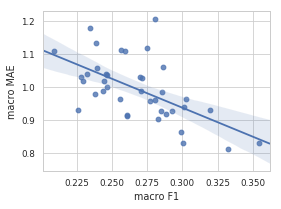

In [61]:
corr_plot('macro F1', 'macro MAE', full)
# ax.figure.savefig(str(IMG_DIR / 'f1-vs-mae.pdf'), bbox_inches='tight')

Pearson correlation = 0.2267, p = 0.165238


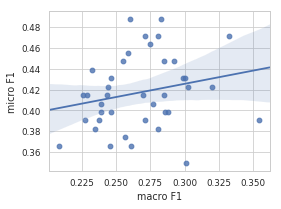

In [62]:
corr_plot('macro F1', 'micro F1', full)
# ax.figure.savefig(str(IMG_DIR / 'f1-vs-acc.pdf'), bbox_inches='tight')

Pearson correlation = -0.1824, p = 0.266484


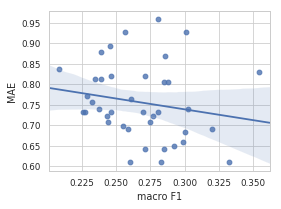

In [63]:
corr_plot('macro F1', 'MAE', full)

Pearson correlation = -0.8279, p = 0.000000


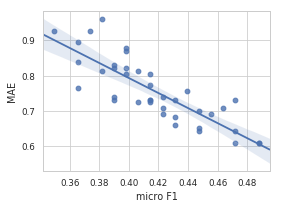

In [64]:
corr_plot('micro F1', 'MAE', full)